In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# index_col = 0를 통해서 Unname 뜨는 것을 방지
df = pd.read_csv('./future_sales.csv', index_col=0)

In [31]:
df

,shop_id,item_id,item_category_id,main_cat_id,sub_cat_id,city_id,build_id,total_price,total_cnt,total_price_mean,year,month
date_block_num,,,,,,,,,,,,
0,5,5037,19,5,12,3,3,0.0,0.0,0.0,2013,1
0,5,5320,55,13,4,3,3,0.0,0.0,0.0,2013,1
0,5,5233,19,5,12,3,3,0.0,0.0,0.0,2013,1
0,5,5232,23,5,18,3,3,0.0,0.0,0.0,2013,1
0,5,5268,20,5,13,3,3,0.0,0.0,0.0,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34,45,18454,55,13,4,20,4,0.0,0.0,0.0,2015,11
34,45,16188,64,14,41,20,4,0.0,0.0,0.0,2015,11
34,45,15757,55,13,4,20,4,0.0,0.0,0.0,2015,11


In [32]:
df_del = df.reset_index()
df_del

,date_block_num,shop_id,item_id,item_category_id,main_cat_id,sub_cat_id,city_id,build_id,total_price,total_cnt,total_price_mean,year,month
0,0,5,5037,19,5,12,3,3,0.0,0.0,0.0,2013,1
1,0,5,5320,55,13,4,3,3,0.0,0.0,0.0,2013,1
2,0,5,5233,19,5,12,3,3,0.0,0.0,0.0,2013,1
3,0,5,5232,23,5,18,3,3,0.0,0.0,0.0,2013,1
4,0,5,5268,20,5,13,3,3,0.0,0.0,0.0,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496995,34,45,18454,55,13,4,20,4,0.0,0.0,0.0,2015,11
7496996,34,45,16188,64,14,41,20,4,0.0,0.0,0.0,2015,11
7496997,34,45,15757,55,13,4,20,4,0.0,0.0,0.0,2015,11
7496998,34,45,19648,40,11,6,20,4,0.0,0.0,0.0,2015,11


# 레그 데이터 추출

In [34]:
month_cnt = df_del.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'total_cnt':'sum','total_price':['sum','mean']})
month_cnt = month_cnt.reset_index()

In [35]:
month_cnt

date_block_num shop_id item_id total_cnt total_price       
                                             sum         sum   mean
0                    0       2      30       0.0         0.0    0.0
1                    0       2      31       0.0         0.0    0.0
2                    0       2      32       0.0         0.0    0.0
3                    0       2      33       1.0       499.0  499.0
4                    0       2      38       0.0         0.0    0.0
...                ...     ...     ...       ...         ...    ...
7496995             34      59   22162       0.0         0.0    0.0
7496996             34      59   22163       0.0         0.0    0.0
7496997             34      59   22164       0.0         0.0    0.0
7496998             34      59   22166       0.0         0.0    0.0
7496999             34      59   22167       0.0         0.0    0.0

[7497000 rows x 6 columns]

In [36]:
month_cnt.columns = month_cnt.columns.droplevel(1)
month_cnt.rename(columns={'item_cnt_day':'month_item_cnt','item_price':'month_item_price',6:'month_price_mean'},inplace=True)
month_cnt.columns = ['date_block_num', 'shop_id', 'item_id', 'month_item_cnt',
       'A', 'B']
month_cnt.rename(columns={'A':'month_item_price','B':'month_price_mean'},inplace=True)
month_cnt = month_cnt.reset_index()
month_cnt.drop([index],axis=1,inplace=True)

,index,date_block_num,shop_id,item_id,month_item_cnt,month_item_price,month_price_mean
0,0,0,2,30,0.0,0.0,0.0
1,1,0,2,31,0.0,0.0,0.0
2,2,0,2,32,0.0,0.0,0.0
3,3,0,2,33,1.0,499.0,499.0
4,4,0,2,38,0.0,0.0,0.0
...,...,...,...,...,...,...,...
7496995,7496995,34,59,22162,0.0,0.0,0.0
7496996,7496996,34,59,22163,0.0,0.0,0.0
7496997,7496997,34,59,22164,0.0,0.0,0.0
7496998,7496998,34,59,22166,0.0,0.0,0.0


In [41]:
month_cnt

,date_block_num,shop_id,item_id,month_item_cnt,month_item_price,month_price_mean
0,0,2,30,0.0,0.0,0.0
1,0,2,31,0.0,0.0,0.0
2,0,2,32,0.0,0.0,0.0
3,0,2,33,1.0,499.0,499.0
4,0,2,38,0.0,0.0,0.0
...,...,...,...,...,...,...
7496995,34,59,22162,0.0,0.0,0.0
7496996,34,59,22163,0.0,0.0,0.0
7496997,34,59,22164,0.0,0.0,0.0
7496998,34,59,22166,0.0,0.0,0.0


In [42]:
# Leg_1 데이터

from tqdm import tqdm

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 1, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_item_cnt"]:
        month_cnt.loc[i, "Leg_1_mic"] = month_cnt_dict["month_item_cnt"][(month_cnt.loc[i, "date_block_num"] - 1, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_1_mic"] = None

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 1, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_item_price"]:
        month_cnt.loc[i, "Leg_1_mip"] = month_cnt_dict["month_item_price"][(month_cnt.loc[i, "date_block_num"] - 1, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_1_mip"] = None

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 1, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_price_mean"]:
        month_cnt.loc[i, "Leg_1_mim"] = month_cnt_dict["month_price_mean"][(month_cnt.loc[i, "date_block_num"] - 1, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_1_mim"] = None

100%|██████████| 7497000/7497000 [09:37<00:00, 12984.19it/s]


In [43]:
month_cnt

,date_block_num,shop_id,item_id,month_item_cnt,month_item_price,month_price_mean,Leg_1_mic,Leg_1_mip,Leg_1_mim
0,0,2,30,0.0,0.0,0.0,NaN,NaN,NaN
1,0,2,31,0.0,0.0,0.0,NaN,NaN,NaN
2,0,2,32,0.0,0.0,0.0,NaN,NaN,NaN
3,0,2,33,1.0,499.0,499.0,NaN,NaN,NaN
4,0,2,38,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7496995,34,59,22162,0.0,0.0,0.0,0.0,0.0,0.0
7496996,34,59,22163,0.0,0.0,0.0,0.0,0.0,0.0
7496997,34,59,22164,0.0,0.0,0.0,0.0,0.0,0.0
7496998,34,59,22166,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Leg_2 데이터

from tqdm import tqdm

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 2, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_item_cnt"]:
        month_cnt.loc[i, "Leg_2_mic"] = month_cnt_dict["month_item_cnt"][(month_cnt.loc[i, "date_block_num"] - 2, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_2_mic"] = None

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 2, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_item_price"]:
        month_cnt.loc[i, "Leg_2_mip"] = month_cnt_dict["month_item_price"][(month_cnt.loc[i, "date_block_num"] - 2, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_2_mip"] = None

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 2, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_price_mean"]:
        month_cnt.loc[i, "Leg_2_mim"] = month_cnt_dict["month_price_mean"][(month_cnt.loc[i, "date_block_num"] - 2, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_2_mim"] = None

100%|██████████| 7497000/7497000 [08:56<00:00, 13977.83it/s]


In [45]:
# Leg_3 데이터

from tqdm import tqdm

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 3, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_item_cnt"]:
        month_cnt.loc[i, "Leg_3_mic"] = month_cnt_dict["month_item_cnt"][(month_cnt.loc[i, "date_block_num"] - 3, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_3_mic"] = None

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 3, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_item_price"]:
        month_cnt.loc[i, "Leg_3_mip"] = month_cnt_dict["month_item_price"][(month_cnt.loc[i, "date_block_num"] - 3, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_3_mip"] = None

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 3, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_price_mean"]:
        month_cnt.loc[i, "Leg_3_mim"] = month_cnt_dict["month_price_mean"][(month_cnt.loc[i, "date_block_num"] - 3, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_3_mim"] = None

100%|██████████| 7497000/7497000 [08:55<00:00, 13989.61it/s]


In [46]:
# Leg_6 데이터

from tqdm import tqdm

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 6, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_item_cnt"]:
        month_cnt.loc[i, "Leg_6_mic"] = month_cnt_dict["month_item_cnt"][(month_cnt.loc[i, "date_block_num"] - 6, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_6_mic"] = None

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 6, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_item_price"]:
        month_cnt.loc[i, "Leg_6_mip"] = month_cnt_dict["month_item_price"][(month_cnt.loc[i, "date_block_num"] - 6, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_6_mip"] = None

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 6, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_price_mean"]:
        month_cnt.loc[i, "Leg_6_mim"] = month_cnt_dict["month_price_mean"][(month_cnt.loc[i, "date_block_num"] - 6, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_6_mim"] = None

100%|██████████| 7497000/7497000 [08:45<00:00, 14275.00it/s]


In [47]:
# Leg_12 데이터

from tqdm import tqdm

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 12, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_item_cnt"]:
        month_cnt.loc[i, "Leg_12_mic"] = month_cnt_dict["month_item_cnt"][(month_cnt.loc[i, "date_block_num"] - 12, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_12_mic"] = None

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 12, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_item_price"]:
        month_cnt.loc[i, "Leg_12_mip"] = month_cnt_dict["month_item_price"][(month_cnt.loc[i, "date_block_num"] - 12, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_12_mip"] = None

month_cnt_dict = month_cnt.set_index(["date_block_num","shop_id","item_id"]).to_dict()

for i in tqdm(month_cnt.index):
    if (month_cnt.loc[i, "date_block_num"] - 12, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"]) in month_cnt_dict["month_price_mean"]:
        month_cnt.loc[i, "Leg_12_mim"] = month_cnt_dict["month_price_mean"][(month_cnt.loc[i, "date_block_num"] - 12, month_cnt.loc[i, "shop_id"], month_cnt.loc[i, "item_id"])]
    else :
        month_cnt.loc[i, "Leg_12_mim"] = None

100%|██████████| 7497000/7497000 [08:21<00:00, 14957.02it/s]


In [57]:
# month_cnt.to_csv('./(김동진)final_12_1.csv',index=False)

In [56]:
month_cnt = month_cnt.fillna(0)
month_cnt

,date_block_num,shop_id,item_id,month_item_cnt,month_item_price,month_price_mean,Leg_1_mic,Leg_1_mip,Leg_1_mim,Leg_2_mic,...,Leg_2_mim,Leg_3_mic,Leg_3_mip,Leg_3_mim,Leg_6_mic,Leg_6_mip,Leg_6_mim,Leg_12_mic,Leg_12_mip,Leg_12_mim
0,0,2,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2,33,1.0,499.0,499.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496995,34,59,22162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,349.0,349.0,1.0,349.0,349.0,0.0,0.0,0.0
7496996,34,59,22163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7496997,34,59,22164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7496998,34,59,22166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 추가 전처리

### MIC, MIP, MIM 이동평균화

In [60]:
month_cnt_mic = month_cnt.groupby('date_block_num')['month_item_cnt'].sum()
month_cnt_mip = month_cnt.groupby('date_block_num')['month_item_price'].sum()
month_cnt_mim = month_cnt.groupby('date_block_num')['month_price_mean'].sum()

In [63]:
# mic 이동 평균화

month_cnt_mic_MA2 = month_cnt_mic.rolling(window=2).mean()
month_cnt_mic_MA3 = month_cnt_mic.rolling(window=3).mean()
month_cnt_mic_MA6 = month_cnt_mic.rolling(window=6).mean()
month_cnt_mic_MA12 = month_cnt_mic.rolling(window=12).mean()

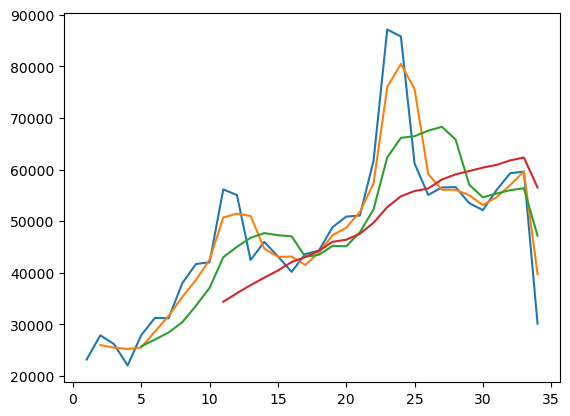

In [69]:
plt.plot(month_cnt_mic_MA2)
plt.plot(month_cnt_mic_MA3)
plt.plot(month_cnt_mic_MA6)
plt.plot(month_cnt_mic_MA12)

plt.show()

In [64]:
# mip 이동 평균화

month_cnt_mip_MA2 = month_cnt_mip.rolling(window=2).mean()
month_cnt_mip_MA3 = month_cnt_mip.rolling(window=3).mean()
month_cnt_mip_MA6 = month_cnt_mip.rolling(window=6).mean()
month_cnt_mip_MA12 = month_cnt_mip.rolling(window=12).mean()

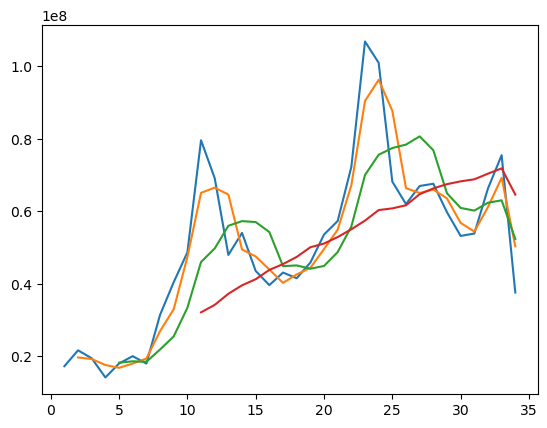

In [70]:
plt.plot(month_cnt_mip_MA2)
plt.plot(month_cnt_mip_MA3)
plt.plot(month_cnt_mip_MA6)
plt.plot(month_cnt_mip_MA12)

plt.show()

In [66]:
# mim 이동 평균화

month_cnt_mim_MA2 = month_cnt_mim.rolling(window=2).mean()
month_cnt_mim_MA3 = month_cnt_mim.rolling(window=3).mean()
month_cnt_mim_MA6 = month_cnt_mim.rolling(window=6).mean()
month_cnt_mim_MA12 = month_cnt_mim.rolling(window=12).mean()

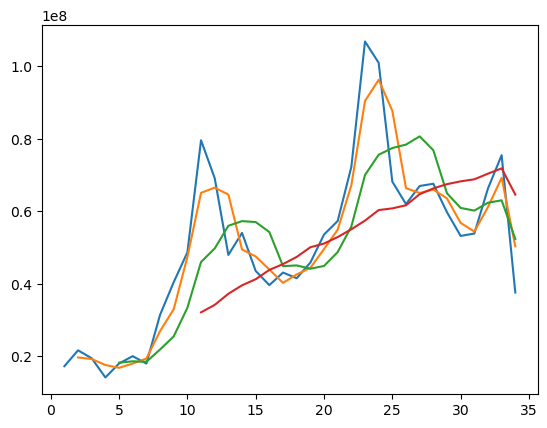

In [71]:
plt.plot(month_cnt_mim_MA2)
plt.plot(month_cnt_mim_MA3)
plt.plot(month_cnt_mim_MA6)
plt.plot(month_cnt_mim_MA12)

plt.show()

### 추가 래그 데이터 생성

In [86]:
# 기존 df_del에 month_cnt 일부 행을 병합

new_df = pd.concat([df_del, month_cnt[['month_item_cnt'	,'month_item_price'	,'month_price_mean',	'Leg_1_mic',	'Leg_1_mip',	'Leg_1_mim'	,'Leg_2_mic', 'Leg_2_mim',	'Leg_3_mic','Leg_3_mip',	'Leg_3_mim',	'Leg_6_mic',	'Leg_6_mip',	'Leg_6_mim'	,'Leg_12_mic'	,'Leg_12_mip',	'Leg_12_mim']]], axis=1)

In [82]:
# new_df = new_df.drop(['index'], axis=1, inplace=True)

In [92]:
new_df.to_csv('./(김동진)final_12_1.csv',index=False)

In [91]:
new_df['date_item_city_cnt_avg_lag1'] = new_df.groupby(['date_block_num', 'item_id','city_id'])['month_item_cnt'].apply(lambda x: x.shift(1).mean())


TypeError: incompatible index of inserted column with frame index